In [ ]:
!pip install "numpy<1.23.0"
!pip install osmnx
!pip install geopandas


In [ ]:
!pip install -U matplotlib==3.1.1

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import networkx as nx
import argparse
from pathlib import Path



# Constantes y Escenario

In [2]:
scenario = 'Malaga'
query = 'Malaga, Andalusia, Spain'
network_type = 'all'
OTHER_INPUT_FORMAT = 'bike-tags'
OTHER_OUTPUT_FORMAT = 'scooter-tags'
input_file = f'map-{scenario}-{network_type}--{OTHER_INPUT_FORMAT}'
output_file = f'map-{scenario}-{network_type}--{OTHER_OUTPUT_FORMAT}'

In [3]:
# Walking_G
network_type_WG = 'walk'
input_file_WG = f'map-{scenario}-{network_type_WG}--{OTHER_INPUT_FORMAT}'
output_file_WG = f'map-{scenario}-{network_type_WG}--{OTHER_OUTPUT_FORMAT}'


In [4]:
OTHER_OUTPUT_UNION_FORMAT = 'union-sc-wk-keys'
output_file_union = f'map-{scenario}-{network_type_WG}--{OTHER_OUTPUT_UNION_FORMAT}'

In [5]:
GRAPH_CRS = 4326

In [6]:
TYPE_USER = 'y'
SCOOTER_SPEED = 2.78 # m/sec <- 25 KM/h 
WALKING_SPEED = 1.25 # m/sec # 
WAITING_PROBABILITY = 0
STOP_TIME = 0
SHOW_MAP = True

Fichero de salida

In [7]:
import sys
IN_COLAB = 'google.colab' in sys.modules

base_path = ''
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    base_path = '/content/gdrive/Shareddrives/happy_mob'
    !ls /content/gdrive/Shareddrives/happy_mob/
else:
    base_path = '.'

In [8]:
data_path = base_path + '/data-osm/'
data_path = data_path + scenario + '/'
Path(data_path).mkdir(parents=True, exist_ok=True)

# Cargamos los mapas

In [9]:
G = ox.load_graphml(data_path + f'{input_file}.graphml')
G_proj = ox.project_graph(G, to_crs=GRAPH_CRS)

In [10]:
# Walking Graph => WG
# WG = ox.load_graphml(data_path + f'{input_file_WG}.graphml')
# WG_proj = ox.project_graph(WG, to_crs=GRAPH_CRS)

In [11]:
# nodes_WG, edges_WG = ox.graph_to_gdfs(WG_proj)

In [12]:
nodes, edges = ox.graph_to_gdfs(G_proj)


## Explorando datos 

### Explorando datos Edge

In [14]:
edges['highway'].explode().unique()

array(['motorway', 'motorway_link', 'unclassified', 'secondary',
       'primary', 'secondary_link', 'footway', 'residential', 'service',
       'cycleway', 'primary_link', 'living_street', 'trunk', 'trunk_link',
       'pedestrian', 'tertiary', 'tertiary_link', 'track', 'path',
       'steps', 'rest_area', 'corridor'], dtype=object)

In [15]:
road_types = ['motorway', 'motorway_link', 'unclassified', 'secondary',
       'primary', 'secondary_link', 'footway', 'service', 'primary_link',
       'residential', 'living_street', 'trunk', 'pedestrian',
       'trunk_link', 'cycleway', 'tertiary', 'tertiary_link', 'steps',
       'track', 'path', 'rest_area', 'corridor']

In [16]:
print(edges.shape)
edges['maxspeed'].value_counts()

(372464, 21)


50     8036
40     1762
30     1691
80      796
100     628
20      315
120     304
60      294
70      166
Name: maxspeed, dtype: int64

In [17]:
edges['highway'].isin(['pedestrian']).value_counts()

False    367761
True       4703
Name: highway, dtype: int64

In [18]:
edges['highway'].isin(['residential']).value_counts()

False    320481
True      51983
Name: highway, dtype: int64

In [19]:
maxspeed = edges[edges['maxspeed'] == '30']
print("edges: ",maxspeed.shape[0] )

edges:  1691


In [20]:
  # It is necessary to plot the map

In [21]:

types_walking_routes = ['cycleway']
print(edges[edges['highway'].isin(types_walking_routes)].shape)



(8129, 21)


### Explorando datos Nodes

In [ ]:
edges.head()

,,,osmid,bridge,oneway,ref,name,highway,maxspeed,length,lanes,access,...,cycleway:both,junction,service,cycleway:right,cycleway,cycleway:left,width,cycleway:right:oneway,landuse,geometry
u,v,key,,,,,,,,,,,,,,,,,,,,,
13837979,13838284,0,42402237,yes,True,MA-20,Ronda Oeste de Malaga,motorway,100,72.794,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-4.46415 36.67538, -4.46448 36.67478)"
13838284,13839377,0,42402237,yes,True,MA-20,Ronda Oeste de Malaga,motorway,100,67.847,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-4.46448 36.67478, -4.46483 36.67424)"
13837996,13838329,0,86429242,NaN,True,A-7,Autovía del Mediterráneo,motorway,120,137.184,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-4.42979 36.75433, -4.43044 36.75321)"
13838329,309857988,0,86429242,NaN,True,A-7,Autovía del Mediterráneo,motorway,120,114.189,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-4.43044 36.75321, -4.43097 36.75228)"
13838014,13838415,0,28211326,NaN,True,A-7,Autovía del Mediterráneo,motorway,120,75.320,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-4.43297 36.74930, -4.43356 36.74882)"


## Tag Masks


In [22]:
edges.keys()
# edges.head()

Index(['osmid', 'bridge', 'oneway', 'ref', 'name', 'highway', 'maxspeed',
       'length', 'lanes', 'access', 'tunnel', 'cycleway:both', 'junction',
       'service', 'cycleway:right', 'cycleway', 'cycleway:left', 'width',
       'cycleway:right:oneway', 'landuse', 'geometry'],
      dtype='object')

In [23]:
edges["cycleway"].notna()

u            v            key
13837979     13838284     0      False
13838284     13839377     0      False
13837996     13838329     0      False
13838329     309857988    0      False
13838014     13838415     0      False
                                 ...  
10182302235  10182302234  0      False
             10182302236  0      False
10182302236  10182302235  0      False
             10182302237  0      False
10182302237  10182302236  0      False
Name: cycleway, Length: 372464, dtype: bool

In [ ]:
# tag_mask = edges["cycleway"].notna()  | \
#            edges["cycleway:both"].notna()   | \
#            edges["cycleway:left"].notna()   | \
#            edges["cycleway:right"].notna()  | \
#            edges["cycleway:right:oneway"].notna() 
#           #   | \
          #  edges["highway"] == "cycleway"

#            edges["cycleway:buffer"].notna() or \
#            edges["cycleway:lane"].notna() or \
#            edges["cycleway:surface"].notna()
# tag_mask = edges["cycleway"].notna() | edges["cycleway:right"].notna()

In [24]:
# Has cycleway or is residential

tag_mask = edges["cycleway"].notna()  | \
           edges["cycleway:both"].notna()   | \
           edges["cycleway:left"].notna()   | \
           edges["cycleway:right"].notna()  | \
           edges["cycleway:right:oneway"].notna() | \
           edges['highway'].isin(["cycleway"]) | \
           edges['highway'].isin(['residential'])

In [25]:
tag_mask

u            v            key
13837979     13838284     0      False
13838284     13839377     0      False
13837996     13838329     0      False
13838329     309857988    0      False
13838014     13838415     0      False
                                 ...  
10182302235  10182302234  0      False
             10182302236  0      False
10182302236  10182302235  0      False
             10182302237  0      False
10182302237  10182302236  0      False
Length: 372464, dtype: bool

In [26]:
edges_scooter = edges[tag_mask] 
# edges_cycle_roads = edges[tag_mask]  # roads of bikes that are in the normal streets
# edges_cycle_way = edges[edges['highway'].isin(["cycleway"])]  # Only bike or VMP allowed 

# edges_roads = pd.concat([edges_cycle_roads, edges_cycle_way])
# edges_high_residential = edges[edges['highway'].isin(['residential'])]
# # edges_high_secondary = edges[edges['highway'].isin(['secondary'])]
# # edges_high_tertiary = edges[edges['highway'].isin(['tertiary'])]
# # edges_high_unclassified = edges[edges['highway'].isin(['unclassified'])]
# # edges_high_cycleway = edges[edges['highway'].isin(['cycleway'])]

# edges_high = pd.concat([edges_high_residential]) #edges_high_tertiary]) 

# edges_maxspeed_allowed =  edges[edges['maxspeed'].isin(['30','20'])]
# edges_scooter = pd.concat([edges_cycle_roads, edges_cycle_way, edges_maxspeed_allowed, edges_high])

# edges_scooter = pd.concat([edges_cycle_roads, edges_cycle_way, edges_high])



In [27]:
edges_non_scooter = edges[~tag_mask]

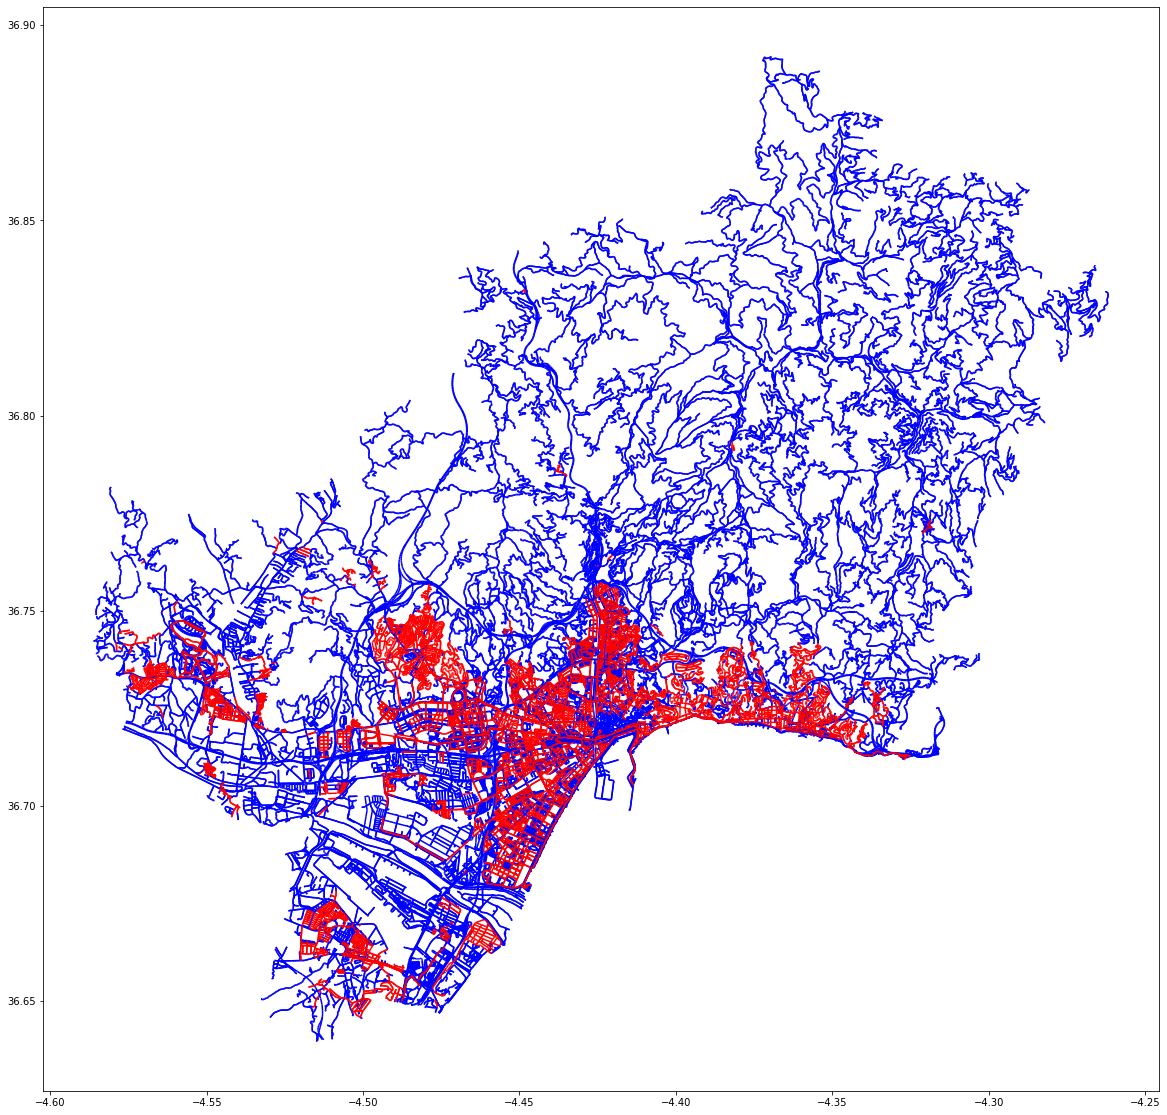

In [ ]:
# edges_roads.overlay(edges_pedestrian, how="union")
fig, ax = plt.subplots(figsize=(20,20))

edges_non_scooter.plot(ax=ax, color="blue")
edges_scooter.plot(ax=ax,color="red")
plt.show()

# Haciendo Grafo de solo rutas Scooter

In [35]:
# To ensure that the graph is valid and has the same CRS
graph_scooter = ox.utils_graph.graph_from_gdfs(nodes, edges_scooter)

graph_scooter_proj = ox.project_graph(graph_scooter, to_crs=GRAPH_CRS)

In [36]:
# # Add an edge attribute for time in minutes required to traverse each edge
for u, v, k, data in graph_scooter_proj.edges(data=True, keys=True):
    try:
        data['time'] = float((data['length']) / SCOOTER_SPEED) # * (1 + (float(max(data['lanes']))-1) * 0.8)
        data['type_edge'] = 'scooter'
    except KeyError:
        data['time'] = (data['length'] / SCOOTER_SPEED)
        data['type_edge'] = 'scooter'

In [37]:
nodes_scooter_proj, edges_scooter_proj = ox.graph_to_gdfs(graph_scooter_proj)

In [38]:
edges_scooter_proj.keys()

Index(['osmid', 'oneway', 'name', 'highway', 'maxspeed', 'length', 'lanes',
       'cycleway:both', 'time', 'type_edge', 'junction', 'cycleway:right',
       'cycleway', 'bridge', 'tunnel', 'cycleway:left', 'access', 'width',
       'cycleway:right:oneway', 'ref', 'service', 'landuse', 'geometry'],
      dtype='object')

In [40]:
edges_scooter_proj.head()

osmid  oneway                    name  \
u          v          key                                              
21290306   2071281801 0     76826111   False  Calle Hermanos Lumiere   
           3652392367 0    832525017   False  Calle Hermanos Lumiere   
2071281801 21290306   0     76826111   False  Calle Hermanos Lumiere   
3652392367 360907356  0    832525017   False  Calle Hermanos Lumiere   
           21290306   0    832525017   False  Calle Hermanos Lumiere   

                             highway maxspeed  length lanes cycleway:both  \
u          v          key                                                   
21290306   2071281801 0    secondary       50  10.143     4   shared_lane   
           3652392367 0    secondary       50  74.917     4   shared_lane   
2071281801 21290306   0    secondary       50  10.143     4   shared_lane   
3652392367 360907356  0    secondary       50  34.697     4   shared_lane   
           21290306   0    secondary       50  74.917     4   shared_lane   

                                time type_edge  ... bridge tunnel  \
u          v          key                       ...                 
21290306   2071281801 0     3.648561   scooter  ...    NaN    NaN   
           3652392367 0    26.948561   scooter  ...    NaN    NaN   
2071281801 21290306   0     3.648561   scooter  ...    NaN    NaN   
3652392367 360907356  0    12.480935   scooter  ...    NaN    NaN   
           21290306   0    26.948561   scooter  ...    NaN    NaN   

                          cycleway:left access width cycleway:right:oneway  \
u          v          key                                                    
21290306   2071281801 0             NaN    NaN   NaN                   NaN   
           3652392367 0             NaN    NaN   NaN                   NaN   
2071281801 21290306   0             NaN    NaN   NaN                   NaN   
3652392367 360907356  0             NaN    NaN   NaN                   NaN   
           21290306   0             NaN    NaN   NaN                   NaN   

                           ref service landuse  \
u          v          key                        
21290306   2071281801 0    NaN     NaN     NaN   
           3652392367 0    NaN     NaN     NaN   
2071281801 21290306   0    NaN     NaN     NaN   
3652392367 360907356  0    NaN     NaN     NaN   
           21290306   0    NaN     NaN     NaN   

                                                                    geometry  
u          v          key                                                     
21290306   2071281801 0    LINESTRING (-4.46471 36.69213, -4.46480 36.69206)  
           3652392367 0    LINESTRING (-4.46471 36.69213, -4.46409 36.69258)  
2071281801 21290306   0    LINESTRING (-4.46480 36.69206, -4.46471 36.69213)  
3652392367 360907356  0    LINESTRING (-4.46409 36.69258, -4.46381 36.69279)  
           21290306   0    LINESTRING (-4.46409 36.69258, -4.46471 36.69213)  

[5 rows x 23 columns]

In [ ]:
# Salvando datos
ox.osm_xml.save_graph_xml(graph_scooter_proj, filepath=data_path + output_file + '.osm')
ox.io.save_graphml(graph_scooter_proj, filepath=data_path + output_file + '.graphml')
ox.io.save_graph_shapefile(graph_scooter_proj, filepath=data_path + output_file + '.shp', encoding='utf-8', directed=True)

/usr/local/lib/python3.8/dist-packages/osmnx/osm_xml.py:184: UserWarning: In order for save_graph_xml to behave properly the graph must have been created with the `all_oneway` setting set to True.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/osmnx/io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.8/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


# Uniendo Walking Graph y Graph of scooter
Esta unión, no permite guardarse en un solo grafo al final. 

In [17]:
# Walking Graph => WG
WG = ox.load_graphml(data_path + f'{input_file_WG}.graphml')
WG_proj = ox.project_graph(WG, to_crs=GRAPH_CRS)

In [28]:
WG_proj.number_of_edges()

393072

In [18]:
SG = ox.load_graphml(data_path + output_file + '.graphml')
SG_proj = ox.project_graph(SG, to_crs=GRAPH_CRS)

In [27]:
SG_proj.number_of_edges()

64177

In [19]:
TYPE_EDGE_WALK = "walk"
# # Add an edge attribute for time in minutes required to traverse each edge
for u, v, k, data in WG_proj.edges(data=True, keys=True):
    try:
        data['time'] = float((data['length']) / WALKING_SPEED) # * (1 + (float(max(data['lanes']))-1) * 0.8)
        data['type_edge'] = TYPE_EDGE_WALK
    except KeyError:
        data['time'] = (data['length'] / WALKING_SPEED)
        data['type_edge'] = TYPE_EDGE_WALK

In [20]:
new_Graph = WG_proj.copy()

In [23]:
for u, v, k, data in SG_proj.edges(data=True, keys=True):
  # Agregar un eje con los atributos de graph_scooter
  new_Graph.add_edge(u_for_edge=u,v_for_edge=v,key=1, **data )

In [24]:
type_data = {'scooter' :  0, 'walk' : 0, 'else':0}
keys_graph = {}
for u, v, k, data in new_Graph.edges(data=True, keys=True):
  try:
    if (data['type_edge'] == 'scooter'):
      type_data['scooter'] +=1
    elif (data['type_edge'] == 'walk'):
      type_data['walk'] +=1
    else:
      type_data['else'] +=1
      print("data else:", data)
      break
  except:
    print("data Except")
    print(data)
    print("data Except end")
  
  if k in keys_graph:
    keys_graph[k] += 1
  else:
    keys_graph[k] = 1 


In [30]:
new_Graph.number_of_edges()

457249

In [25]:
print(keys_graph.keys())
print(keys_graph.items())

dict_keys([0, 1])
dict_items([(0, 393072), (1, 64177)])


In [26]:
print(type_data)

{'scooter': 64177, 'walk': 393072, 'else': 0}


In [ ]:
ox.osm_xml.save_graph_xml(new_Graph, filepath=data_path + output_file_union + '.osm')
ox.io.save_graphml(new_Graph, filepath=data_path + output_file_union + '.graphml')
ox.io.save_graph_shapefile(new_Graph, filepath=data_path + output_file_union + '.shp', encoding='utf-8', directed=True)

#### Parámetros e inicializaciones

In [ ]:
G_union = ox.load_graphml(data_path + output_file_union + '.graphml')
graph_union_proj = ox.project_graph(G_union, to_crs=GRAPH_CRS)

In [ ]:
nodes_union, edges_union = ox.graph_to_gdfs(graph_union_proj)

In [ ]:
edges_union.keys()

In [ ]:
edges_union['type_edge'].value_counts()

In [ ]:
edges_union['type_edge'].explode().unique()